In [3]:
inputfile = 'Final_Air_Quality_Data.csv'

In [4]:
#States are clustered according to 2014 data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# Visualize the plot
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv(inputfile, encoding = "ISO-8859-1")
df = df[df['Year'] == 2014]
df = df.drop(['Year'], axis = 1)

In [6]:
# df = df[df['Year'] == 2014]
# df = df.drop(['Year'], axis = 1)

In [7]:
def showdist(df):
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    sns.distplot(df['so2'], ax = ax[0])
    sns.distplot(df['no2'], ax = ax[1])
    sns.distplot(df['rspm'], ax = ax[2])
    plt.show()
# showdist(df)

In [8]:
# from sklearn.preprocessing import power_transform# Extract the specific column and convert it as a numpy array
X = df[['so2', 'no2', 'rspm']].values# Transform the data
# X = df[['rspm']].values
# df2 = power_transform(X, method='yeo-johnson')

In [9]:
from sklearn.preprocessing import MinMaxScaler# Instantiate the object
scaler = MinMaxScaler()# Fit and transform the data
X = scaler.fit_transform(X)
X[:,0]

array([0.34948494, 0.        , 0.2524063 , 0.40520228, 0.        ,
       0.428449  , 0.29762999, 0.30993461, 0.16466417, 0.06609607,
       0.64327103, 0.58317479, 0.00772722, 0.17747342, 0.62268328,
       0.33173617, 0.11380587, 0.45207987, 0.84743798, 0.03772376,
       0.15091393, 0.00217933, 0.        , 0.1583169 , 0.36820965,
       0.36753993, 0.28449094, 1.        , 0.49880122, 0.44229111,
       0.9638584 , 0.31894576])

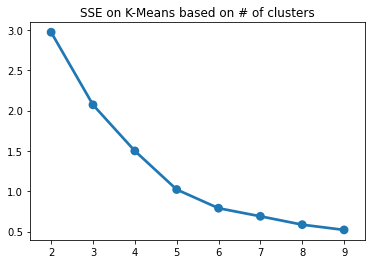

In [10]:
from sklearn.cluster import KMeans# To make sure our work becomes reproducible
np.random.seed(42) 
inertia = []# Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(X)
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters')
plt.show()

In [11]:
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=5)# Fit the model
model.fit(X)# Predict the cluster from the data and save it
cluster = model.predict(X)# Add to the dataframe and show the result
df['cluster'] = cluster
for i in range(5):
    print("Cluster:", i)
    print("The Members:", ' | '.join(list(df[df['cluster'] == i]['State'].values)))
    print("Total Members:", len(list(df[df['cluster'] == i]['State'].values)))
    print()

Cluster: 0
The Members: Bihar | Chhattisgarh | Haryana | Jharkhand | Madhya Pradesh | Punjab | Rajasthan | Uttar Pradesh
Total Members: 8

Cluster: 1
The Members: Arunachal Pradesh | Chandigarh | Goa | Himachal Pradesh | Jammu & Kashmir | Kerala | Manipur | Meghalaya | Mizoram | Nagaland | Odisha
Total Members: 11

Cluster: 2
The Members: Andhra Pradesh | Assam | Dadra & Nagar Haveli | Daman & Diu | Karnataka | Puducherry | Tamil Nadu
Total Members: 7

Cluster: 3
The Members: Gujarat | Maharashtra | Sikkim | Uttarakhand
Total Members: 4

Cluster: 4
The Members: Delhi | West Bengal
Total Members: 2



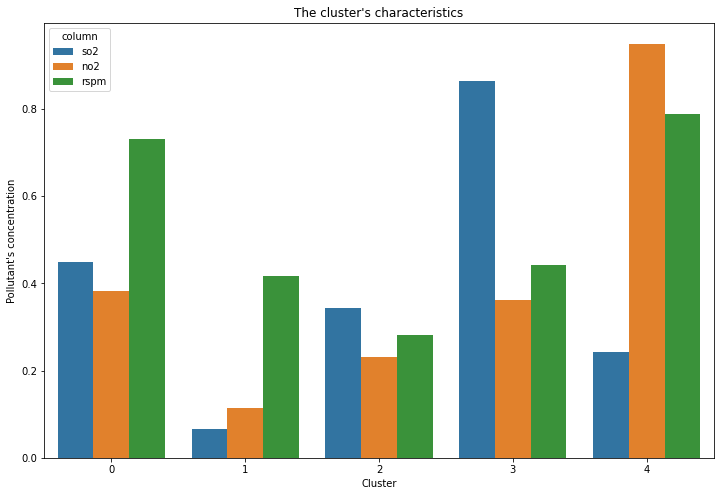

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt# Create the dataframe to ease our visualization process
visualize = pd.DataFrame(model.cluster_centers_) #.reset_index()
visualize = visualize.T
visualize['column'] = ['so2', 'no2', 'rspm']
# visualize['column'] = ['rspm']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')# Visualize the result
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)

plt.xlabel("Cluster")
plt.ylabel('Pollutant\'s concentration')
plt.title('The cluster\'s characteristics')
plt.savefig('Cluster vs Pollutant\'s concentration.png')
plt.show()

In [16]:
# Cluster: 0
# The Members: Arunachal Pradesh | Assam | Chandigarh | Goa | Himachal Pradesh | Jammu & Kashmir | Kerala | Manipur | Meghalaya | Mizoram | Nagaland | Odisha
# Total Members: 12

# Cluster: 1
# The Members: Bihar | Chhattisgarh | Haryana | Jharkhand | Madhya Pradesh | Punjab | Rajasthan | Uttar Pradesh
# Total Members: 8

# Cluster: 2
# The Members: Maharashtra | Sikkim | Uttarakhand
# Total Members: 3

# Cluster: 3
# The Members: Delhi | West Bengal
# Total Members: 2

# Cluster: 4
# The Members: Andhra Pradesh | Dadra & Nagar Haveli | Daman & Diu | Gujarat | Karnataka | Puducherry | Tamil Nadu
# Total Members: 7

In [26]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import pandas as pd
# import numpy as np

# v = np.random.rand(10,4)
# v[:,3] = np.random.randint(0,2,size=10)
# df = pd.DataFrame(v, columns=['Feature1', 'Feature2','Feature3',"Cluster"])
# print (df)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# x = np.array(df['Feature1'])
# y = np.array(df['Feature2'])
# z = np.array(df['Feature3'])

# ax.scatter(x,y,z, marker="s", c=df["Cluster"], s=40, cmap="RdBu")

# plt.show()

KeyError: 'so2'